In [47]:
from sqlalchemy import create_engine

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [74]:
pd.options.display.max_rows = 30
pd.options.display.max_colwidth = 1000

## Database connexion

In [3]:
# Personal login details in correct format for sqlalchemy

with open('/Users/nbosc/notebooks/alchemy_nbosc_login.txt', 'r') as f:
    engine = create_engine(f.read())

##  Single protein - confidence score 9 (SP9)

In [51]:
sql = '''
SELECT a.DOC_ID
    , h.year
    , a.PCHEMBL_VALUE
    , e.CANONICAL_SMILES
    , c.CHEMBL_ID AS MOL_CHEMBLID
    , g.CHEMBL_ID AS TARGET_CHEMBLID
    , g.pref_name
    , f.CONFIDENCE_SCORE
    , g.target_type
    , f.relationship_type
    , g.organism
FROM
  CHEMBL_23.ACTIVITIES a JOIN CHEMBL_23.MOLECULE_HIERARCHY b ON a.MOLREGNO = b.MOLREGNO
  JOIN CHEMBL_23.MOLECULE_DICTIONARY c ON b.PARENT_MOLREGNO = c.MOLREGNO
  JOIN CHEMBL_23.COMPOUND_PROPERTIES d ON b.PARENT_MOLREGNO = d.MOLREGNO
  JOIN CHEMBL_23.COMPOUND_STRUCTURES e ON b.PARENT_MOLREGNO = e.MOLREGNO
  JOIN CHEMBL_23.ASSAYS f ON a.assay_id = f.assay_id
  JOIN CHEMBL_23.TARGET_DICTIONARY g ON f.TID = g.TID
  JOIN CHEMBL_23.DOCS h ON a.DOC_ID = h.DOC_ID
WHERE
   a.PCHEMBL_VALUE IS NOT null
  AND (a.POTENTIAL_DUPLICATE = 0 OR a.POTENTIAL_DUPLICATE IS NULL)
  AND a.DATA_VALIDITY_COMMENT IS NULL
  AND g.TARGET_TYPE IN ('SINGLE PROTEIN')
  AND f.src_id = 1
  AND (NOT (a.ACTIVITY_COMMENT LIKE 'inconclusive' OR a.activity_comment LIKE 'undetermined')
      OR a.ACTIVITY_COMMENT IS NULL)
  AND d.PSA IS NOT NULL
  AND f.confidence_score = 9
'''
df_sp9 = pd.read_sql(sql, engine)

In [52]:
df_sp9.target_chemblid.nunique()

3876

##  Single protein - confidence score 8 (SP8)

In [53]:
sql = '''
SELECT a.DOC_ID
    , h.year
    , a.PCHEMBL_VALUE
    , e.CANONICAL_SMILES
    , c.CHEMBL_ID AS MOL_CHEMBLID
    , g.CHEMBL_ID AS TARGET_CHEMBLID
    , g.pref_name
    , f.CONFIDENCE_SCORE
    , g.target_type
    , f.relationship_type
    , g.organism
FROM
  CHEMBL_23.ACTIVITIES a JOIN CHEMBL_23.MOLECULE_HIERARCHY b ON a.MOLREGNO = b.MOLREGNO
  JOIN CHEMBL_23.MOLECULE_DICTIONARY c ON b.PARENT_MOLREGNO = c.MOLREGNO
  JOIN CHEMBL_23.COMPOUND_PROPERTIES d ON b.PARENT_MOLREGNO = d.MOLREGNO
  JOIN CHEMBL_23.COMPOUND_STRUCTURES e ON b.PARENT_MOLREGNO = e.MOLREGNO
  JOIN CHEMBL_23.ASSAYS f ON a.assay_id = f.assay_id
  JOIN CHEMBL_23.TARGET_DICTIONARY g ON f.TID = g.TID
  JOIN CHEMBL_23.DOCS h ON a.DOC_ID = h.DOC_ID
WHERE
   a.PCHEMBL_VALUE IS NOT null
  AND (a.POTENTIAL_DUPLICATE = 0 OR a.POTENTIAL_DUPLICATE IS NULL)
  AND a.DATA_VALIDITY_COMMENT IS NULL
  AND g.TARGET_TYPE IN ('SINGLE PROTEIN')
  AND f.src_id = 1
  AND (NOT (a.ACTIVITY_COMMENT LIKE 'inconclusive' OR a.activity_comment LIKE 'undetermined')
      OR a.ACTIVITY_COMMENT IS NULL)
  AND d.PSA IS NOT NULL
  AND f.confidence_score = 8
'''
df_sp8 = pd.read_sql(sql, engine)

In [54]:
df_sp8.target_chemblid.nunique()

2279

#### What is the overlap between SP9 and SP8? 

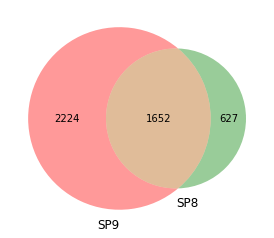

In [57]:
venn2([set(df_sp9.target_chemblid.tolist()), set(df_sp8.target_chemblid.tolist())], set_labels=['SP9', 'SP8'])
plt.show()

2/3 of SP8 are in SP9.<br>
I do not think it is worth focusing on these 1652 proteins, i.e. merge the sp9 and the sp8 because that would mean build models of a mixture of  the protein with homologous proteins.

#### What about the 627 SP8 not in SP9? 

In [72]:
df_sp8_no_sp9 = df_sp8.loc[~df_sp8.target_chemblid.isin(df_sp9.target_chemblid)]

In [75]:
df_sp8_no_sp9.groupby(['target_chemblid', 'organism'])['mol_chemblid'].nunique().reset_index().sort_values('mol_chemblid', ascending = False)

,target_chemblid,organism,mol_chemblid
248,CHEMBL2802,Clostridium perfringens (strain 13 / Type A),239
355,CHEMBL3423,Escherichia coli K-12,219
346,CHEMBL3377,Influenza B virus (strain B/Lee/1940),201
445,CHEMBL4028,Rattus norvegicus,160
219,CHEMBL2626,Sus scrofa,157
67,CHEMBL1939,Plasmodium falciparum K1,145
83,CHEMBL2026,Escherichia coli K-12,135
520,CHEMBL4620,Hepatitis C virus genotype 1a (isolate 1) (HCV),131
538,CHEMBL4744,Bos taurus,119
185,CHEMBL2384,Rattus norvegicus,102


Few activities associated in the end. A dozen might be used but that is before processing the compound activities so I do think it is worth spending too much time on them. In addition, no human protein.

### Conclusion
I think SP8 should be ignored

---

##  Protein complex - confidence score 7 (PC7)

In [61]:
sql = '''
SELECT a.DOC_ID
    , h.year
    , a.PCHEMBL_VALUE
    , e.CANONICAL_SMILES
    , c.CHEMBL_ID AS MOL_CHEMBLID
    , g.CHEMBL_ID AS TARGET_CHEMBLID
    , g.pref_name
    , f.CONFIDENCE_SCORE
    , g.target_type
    , f.relationship_type
    , g.organism
FROM
  CHEMBL_23.ACTIVITIES a JOIN CHEMBL_23.MOLECULE_HIERARCHY b ON a.MOLREGNO = b.MOLREGNO
  JOIN CHEMBL_23.MOLECULE_DICTIONARY c ON b.PARENT_MOLREGNO = c.MOLREGNO
  JOIN CHEMBL_23.COMPOUND_PROPERTIES d ON b.PARENT_MOLREGNO = d.MOLREGNO
  JOIN CHEMBL_23.COMPOUND_STRUCTURES e ON b.PARENT_MOLREGNO = e.MOLREGNO
  JOIN CHEMBL_23.ASSAYS f ON a.assay_id = f.assay_id
  JOIN CHEMBL_23.TARGET_DICTIONARY g ON f.TID = g.TID
  JOIN CHEMBL_23.DOCS h ON a.DOC_ID = h.DOC_ID
WHERE
   a.PCHEMBL_VALUE IS NOT null
  AND (a.POTENTIAL_DUPLICATE = 0 OR a.POTENTIAL_DUPLICATE IS NULL)
  AND a.DATA_VALIDITY_COMMENT IS NULL
  AND g.TARGET_TYPE IN ('PROTEIN COMPLEX')
  AND f.src_id = 1
  AND (NOT (a.ACTIVITY_COMMENT LIKE 'inconclusive' OR a.activity_comment LIKE 'undetermined')
      OR a.ACTIVITY_COMMENT IS NULL)
  AND d.PSA IS NOT NULL
  AND f.confidence_score = 7
'''
df_pc7 = pd.read_sql(sql, engine)

In [62]:
df_pc7.target_chemblid.nunique()

169

##  Protein complex - confidence score 6 (PC6)

In [64]:
sql = '''
SELECT a.DOC_ID
    , h.year
    , a.PCHEMBL_VALUE
    , e.CANONICAL_SMILES
    , c.CHEMBL_ID AS MOL_CHEMBLID
    , g.CHEMBL_ID AS TARGET_CHEMBLID
    , g.pref_name
    , f.CONFIDENCE_SCORE
    , g.target_type
    , f.relationship_type
    , g.organism
FROM
  CHEMBL_23.ACTIVITIES a JOIN CHEMBL_23.MOLECULE_HIERARCHY b ON a.MOLREGNO = b.MOLREGNO
  JOIN CHEMBL_23.MOLECULE_DICTIONARY c ON b.PARENT_MOLREGNO = c.MOLREGNO
  JOIN CHEMBL_23.COMPOUND_PROPERTIES d ON b.PARENT_MOLREGNO = d.MOLREGNO
  JOIN CHEMBL_23.COMPOUND_STRUCTURES e ON b.PARENT_MOLREGNO = e.MOLREGNO
  JOIN CHEMBL_23.ASSAYS f ON a.assay_id = f.assay_id
  JOIN CHEMBL_23.TARGET_DICTIONARY g ON f.TID = g.TID
  JOIN CHEMBL_23.DOCS h ON a.DOC_ID = h.DOC_ID
WHERE
   a.PCHEMBL_VALUE IS NOT null
  AND (a.POTENTIAL_DUPLICATE = 0 OR a.POTENTIAL_DUPLICATE IS NULL)
  AND a.DATA_VALIDITY_COMMENT IS NULL
  AND g.TARGET_TYPE IN ('PROTEIN COMPLEX')
  AND f.src_id = 1
  AND (NOT (a.ACTIVITY_COMMENT LIKE 'inconclusive' OR a.activity_comment LIKE 'undetermined')
      OR a.ACTIVITY_COMMENT IS NULL)
  AND d.PSA IS NOT NULL
  AND f.confidence_score = 6
'''
df_pc6 = pd.read_sql(sql, engine)

In [65]:
df_pc6.target_chemblid.nunique()

88

#### What is the overlap between PC7 and PC6? 

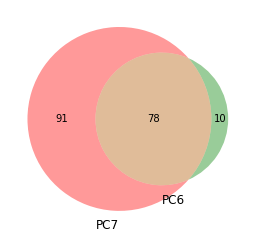

In [68]:
venn2([set(df_pc7.target_chemblid.tolist()), set(df_pc6.target_chemblid.tolist())], set_labels=['PC7', 'PC6'])
plt.show()

4/5 of PC6 are in PC7.<br>

#### What about the 627 SP8 not in SP9? 

In [69]:
df_pc6_no_pc7 = df_pc6.loc[~df_pc6.target_chemblid.isin(df_pc7.target_chemblid)]

In [70]:
df_pc6_no_pc7.groupby(['target_chemblid', 'organism'])['mol_chemblid'].nunique().reset_index().sort_values('mol_chemblid', ascending = False)

,target_chemblid,organism,mol_chemblid
1,CHEMBL2095173,Homo sapiens,220
0,CHEMBL1907597,Homo sapiens,24
2,CHEMBL2095199,Rattus norvegicus,21
6,CHEMBL2111402,Homo sapiens,20
5,CHEMBL2111362,Homo sapiens,10
4,CHEMBL2109238,Homo sapiens,8
9,CHEMBL613815,Septoria tritici,6
3,CHEMBL2109236,Homo sapiens,2
8,CHEMBL3638171,Oryctolagus cuniculus,2
7,CHEMBL2364672,Bacteria,1


Very few activities associated except for [CHEMBL2095173](https://www.ebi.ac.uk/chembl/target/inspect/CHEMBL2095173).

### Conclusion
I think PC6 should be ignored